INTRODUCTION

This analysis will focus on the use of time series analysis to examine the relationship between call-money/interbank rate, GDP growth and inflation in India. Inflation refers to the rise in general price level. GDP growth refers to the growth in economic output of a country. Call-money/interbank rate is a type of interest rate at which money is borrowed and lent among big financial institutions like banks, corporations and asset management companies. Moreover, the research question that this project will try to address is: How does a sudden shock in interbank rate affect inflation and GDP growth in India?

The specific analysis that will be used in this project is something called as Vector Auto Regression or VAR. VAR is used when multiple time series are present and it helps to capture the relationship between them. 

In [1]:
#importing the dataset
import pandas as pd

data = pd.read_excel("/Users/mr.malhaar/Desktop/data.xlsx")
data=data.set_index("Quarter")
data.drop(data.columns[3], axis =1, inplace = True)
data

,GDP_Growth,Inflation_Growth,IB_Rate
Quarter,,,
2000-01-01,3.73173,3.221408,0.000000
2000-04-01,0.60463,1.580212,-1.000000
2000-07-01,2.02882,-1.119296,1.000000
2000-10-01,1.18117,-1.157645,0.000000
2001-01-01,1.63466,-0.051855,-0.500000
...,...,...,...
2021-04-01,-9.16090,0.889860,0.000000
2021-07-01,10.90554,-0.501449,0.000000
2021-10-01,10.78690,0.144928,0.000000


In [4]:
#Exploratory data analysis
data.describe()

,GDP_Growth,Inflation_Growth,IB_Rate
count,90.000000,90.000000,90.000000
mean,3.011980,0.066922,-0.037296
std,4.486937,1.301685,0.401832
min,-24.674610,-3.664231,-1.000000
25%,2.132770,-0.750617,-0.161458
50%,3.023845,-0.026383,0.000000
75%,3.723935,0.989187,0.000000
max,24.963810,3.221408,1.750000


ADF Test

We need to conduct a statistical test called Augmented-Dickey Fuller (ADF) test in order to determine whether the three time series are stationary or not. It is important to do this test as a non-stationary time series cannot be used for further analysis because stationarity is an underlying assumption for many statistical procedures. If a time series is not found to be stationary, then the series has to be made stationary through a process called as differencing. 

In [5]:
#ADF test for GDP growth
from statsmodels.tsa.stattools import adfuller

result = adfuller(data.GDP_Growth)
output = pd.Series(result[0:4], index=["ADF Statisitcs: ", "p-value: ", "Number of lags used: ", "Number of observations: "])
print("\x1B[4mADF test for GDP growth\x1B[0m")
print(output)
for keys, values in result[4].items():
    print("Critical Values:")
    print(f"{keys}: {values}")
    
if output["p-value: "] < 0.05:
    print("The series is stationary at 5% level.")
else:
    print("The series in non-stationary.")

ADF test for GDP growth
ADF Statisitcs:             -4.868852
p-value:                     0.000040
Number of lags used:         3.000000
Number of observations:     86.000000
dtype: float64
Critical Values:
1%: -3.5087828609430614
Critical Values:
5%: -2.895783561573195
Critical Values:
10%: -2.5850381719848565
The series is stationary at 5% level.


In [6]:
#ADF test for Inflation
from statsmodels.tsa.stattools import adfuller

result = adfuller(data.Inflation_Growth)
output = pd.Series(result[0:4], index=["ADF Statisitcs: ", "p-value: ", "Number of lags used: ", "Number of observations: "])
print("\x1B[4mADF test for inflation growth\x1B[0m")
print(output)
for keys, values in result[4].items():
    print("Critical Values:")
    print(f"{keys}: {values}")
    
if output["p-value: "] < 0.05:
    print("The series is stationary at 5% level.")
else:
    print("The series in non-stationary.")

ADF test for inflation growth
ADF Statisitcs:             -4.713893
p-value:                     0.000079
Number of lags used:         7.000000
Number of observations:     82.000000
dtype: float64
Critical Values:
1%: -3.512738056978279
Critical Values:
5%: -2.8974898650628984
Critical Values:
10%: -2.585948732897085
The series is stationary at 5% level.


In [7]:
#ADF test for interbank rate
from statsmodels.tsa.stattools import adfuller

result = adfuller(data.IB_Rate)
output = pd.Series(result[0:4], index=["ADF Statisitcs: ", "p-value: ", "Number of lags used: ", "Number of observations: "])
print("\x1B[4mADF test for interbank rate\x1B[0m")
print(output)
for keys, values in result[4].items():
    print("Critical Values:")
    print(f"{keys}: {values}")
    
if output["p-value: "] < 0.05:
    print("The series is stationary at 5% level.")
else:
    print("The series in non-stationary.")

ADF test for interbank rate
ADF Statisitcs:            -9.203354e+00
p-value:                    1.974704e-15
Number of lags used:        0.000000e+00
Number of observations:     8.900000e+01
dtype: float64
Critical Values:
1%: -3.506057133647011
Critical Values:
5%: -2.8946066061911946
Critical Values:
10%: -2.5844100201994697
The series is stationary at 5% level.


We can see that all three of the time series's are stationary and there is no need to do differencing.

Now, we will have to convert these three time series’ into a VAR model. However, in order to fit these series’ into a VAR model, we would have to choose an ideal selection order. An ideal selection order is basically the number of lags (time period in the past) that has to be considered to avoid over-fitting the dataset. We would be using a statistical test called Akaike Information Criterion (AIC), which is a goodness-of-fit test that penalizes if the data becomes too complicated. So, this test would help in striking a balance between the ability to fit a dataset into a VAR model and avoiding over-fitting.

In [8]:
from statsmodels.tsa.api import VAR

VAR_model = VAR(data)
print(VAR_model.select_order().summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        1.788      1.879*       5.979      1.824*
1        1.821       2.183       6.179       1.966
2        1.701       2.336       5.489       1.955
3        1.801       2.707       6.080       2.164
4        1.685       2.864       5.444       2.157
5        1.691       3.141       5.521       2.271
6        1.707       3.429       5.682       2.397
7        1.684       3.678       5.649       2.483
8        1.639       3.905       5.525       2.546
9       1.533*       4.071      5.119*       2.549
10       1.641       4.451       5.932       2.766
11       1.567       4.649       5.781       2.801
12       1.586       4.940       6.259       2.929
--------------------------------------------------


/Users/mr.malhaar/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'


In [9]:
#fitting the model
result = VAR_model.fit(9)

In [10]:
print(result.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 18, Apr, 2023
Time:                     19:22:13
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    3.87796
Nobs:                     81.0000    HQIC:                   2.39109
Log likelihood:          -317.293    FPE:                    4.41020
AIC:                      1.39483    Det(Omega_mle):         1.80982
--------------------------------------------------------------------
Results for equation GDP_Growth
                         coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------
const                       7.224624         2.831695            2.551           0.011
L1.GDP_Growth              -0.282268         0.144591           -1.952           0.051
L1.Inflation_Growth         0.2

Granger-Causality Test

After fitting the dataset into a VAR model with 9 lags, we will now look at Granger Causality Test. This test is a statistical method which uses hypothesis testing in order to determine whether one time series has causality with another time series.

In [74]:
print(result.test_causality("GDP_Growth","IB_Rate").summary())

Granger causality F-test. H_0: IB_Rate does not Granger-cause GDP_Growth. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value    df   
----------------------------------------------
        0.3433          1.939   0.959 (9, 159)
----------------------------------------------


The null hypothesis for this test was that interbank rate has no causality with GDP growth. As seen in the figure, the p-value is 0.959, which is greater than 0.05 means that the null hypothesis is accepted at 5% significance level. Moreover, it can be inferred that interbank rate has no causality with GDP growth.

In [68]:
print(result.test_causality("Inflation_Growth","IB_Rate").summary())

Granger causality F-test. H_0: IB_Rate does not Granger-cause Inflation_Growth. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value    df   
----------------------------------------------
         2.577          1.939   0.009 (9, 159)
----------------------------------------------


The null hypothesis for this test was that interbank rate has no causality with inflation growth. The p-value in this scenario is 0.009, which is lesser than 0.05 means that the null hypothesis will be rejected at 5% significance level. Subsequently, the inference is that interbank rate has causality with inflation growth.

Impulse Response Function

Moving on, we will now focus on impulse response functions. Impulse response function traces out the time path in the model to a unit change (“shock”) in one of the variables. In other words, what is the effect of a unit shock of X on Y where X and Y are some arbitrary variables. The magnitude of the shock is increase in one standard deviation. There are several ways to approach and conduct this analysis, but we would be doing the orthogonalised method. The basic idea is to decompose the variance-covariance matrix, which is obtained from Choleski decomposition.

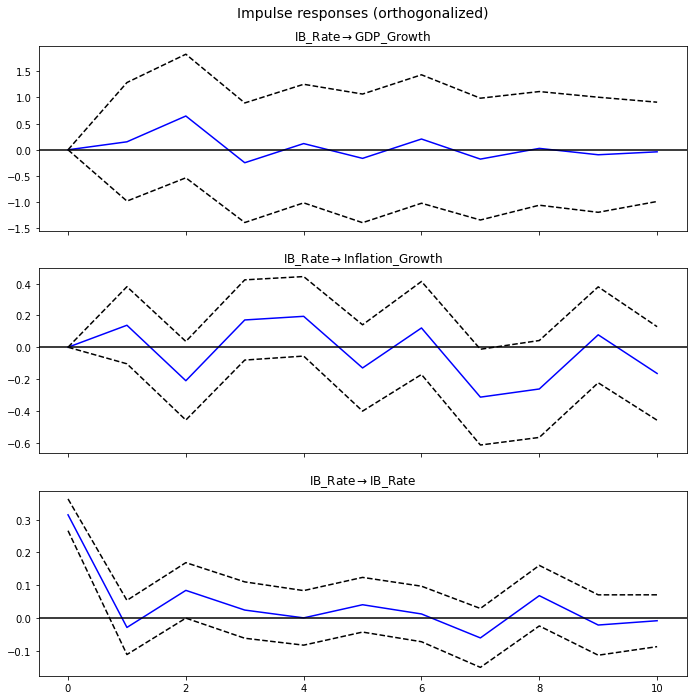

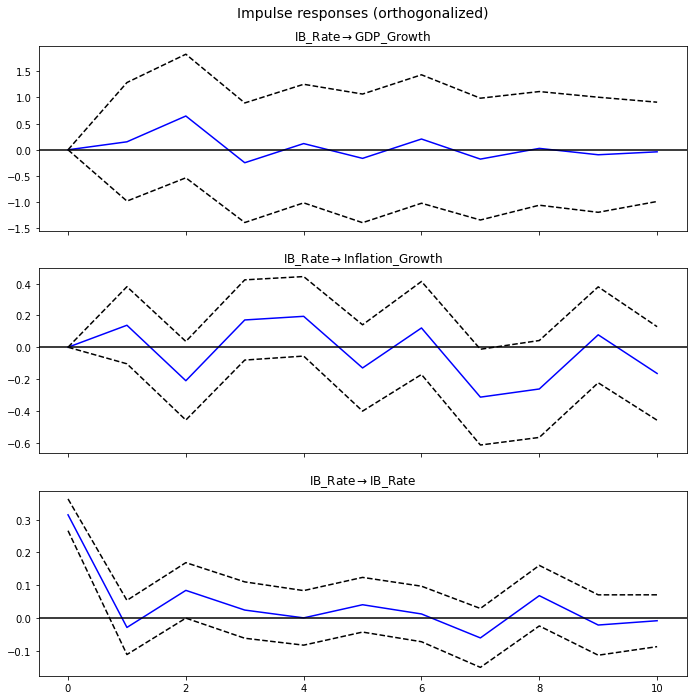

In [7]:
irf =result.irf()
irf.plot(orth=True, impulse = "IB_Rate")

The way to interpret the graph is as follows: in the second graph, a unit shock in the interbank rate would have a positive impact on inflation growth in the first quarter. However, in the second quarter, a sharp decline is seen. Similarly, in the first graph, a unit shock on interbank rate results in a positive impact on GDP growth in the first and second quarter. However, the effect steadies down at 0 after reaching the peak in the second quarter. This shows that a sudden shock in the interbank rate does not have much impact on GDP growth in the long term. However, for inflation growth, the effect is very volatile.

In the third graph, the initial shock is seen. However, the shock quickly dies out as the impact comes down to approximately 0 in the second time period itself. Furthermore, slight variations are seen in the subsequent time periods but not as extreme as inflation growth. 

Conclusion

Coming back to our research question and looking at the impulse response functions, we can say that a sudden shock on interbank rate would cause fluctuation in the inflation rate, even in medium to long time duration. The pattern is similar for GDP growth as well, but the impact quickly dies out and converges to 0. 